In [1]:
import numpy as np
from matplotlib import pyplot as plt
import GPy
kernels = GPy.kern

from ipywidgets import interact

### Outline

* Mathematical GP Model
* Fitting GP to a dataset in simplest settings
* Review of RBF kernel and its hyperparameters
* Kernel combinations
* Change kernel and refit the data
* Some points:
    * What should happen v/s what happens when we predict far from the training data: (periodic + rbf, periodic * rbf)
    * ARD
    * Effect of hyperparameters on GP fit in general ([vizgp visualization](http://www.infinitecuriosity.org/vizgp/))

## GP Model

https://gregorygundersen.com/blog/2019/06/27/gp-regression/#noisy-observations

## GP Regression

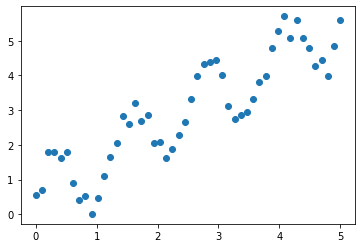

In [2]:
n = 50
X = np.linspace(0, 5, n).reshape(-1,1)
y = X + np.sin(5*X) + np.random.rand(n,1)*0.8

plt.scatter(X, y);

In [3]:
# Define the kernel
# kernel = kernels.RBF(input_dim=1)
kernel = kernels.StdPeriodic(1) + kernels.Linear(1)

# Define the model
model = GPy.models.GPRegression(X=X, Y=y, kernel=kernel)
model

GP_regression.,value,constraints,priors
sum.std_periodic.variance,1.0,+ve,
sum.std_periodic.period,1.0,+ve,
sum.std_periodic.lengthscale,1.0,+ve,
sum.linear.variances,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


## Manually fit the model

In [4]:
# Best hyperparameters
@interact(lengthscale=(0.1, 5.0), variance=(0.1, 5.0), noise_var=(0.01, 0.1))
def gp_model_fit(lengthscale, variance, noise_var):
    kernel = kernels.RBF(input_dim=1, lengthscale=lengthscale, variance=variance)
    model = GPy.models.GPRegression(X=X, Y=y, kernel=kernel, noise_var=noise_var)
    model.plot()

interactive(children=(FloatSlider(value=2.5500000000000003, description='lengthscale', max=5.0, min=0.1), Floa…

Optimization restart 1/10, f = 11.085406483756735
Optimization restart 2/10, f = 61.23893851268161
Optimization restart 3/10, f = 11.085406375638385
Optimization restart 4/10, f = 14.169627750496275
Optimization restart 5/10, f = 11.085434767611844
Optimization restart 6/10, f = 32.76080168531926
Optimization restart 7/10, f = 11.085406375996048
Optimization restart 8/10, f = 11.085406375640659
Optimization restart 9/10, f = 27.621627108171197
Optimization restart 10/10, f = 11.08540637600349


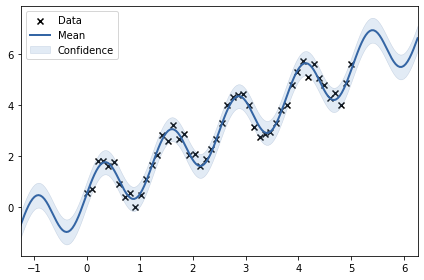

In [6]:
# Automatically optimize the model hyperparameters
# model.optimize()
model.optimize_restarts(num_restarts=10)
model.plot();

## Kernels

In [7]:
rbf_kernel = kernels.RBF(input_dim=1, active_dims=[0], lengthscale=0.5, variance=2.0)
rbf_kernel

rbf.,value,constraints,priors
variance,2.0,+ve,
lengthscale,0.5,+ve,


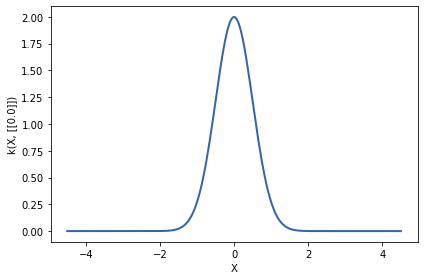

In [8]:
rbf_kernel.plot();

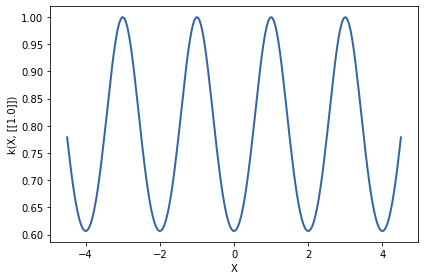

In [9]:
periodic_kernel = kernels.StdPeriodic(1, period=2)
periodic_kernel.plot();

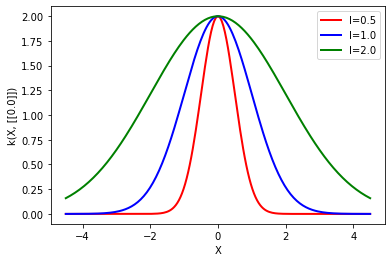

In [10]:
fig, ax = plt.subplots()
for lengthscale, color in zip([0.5, 1.0, 2.0], ['r', 'b', 'g']):
    rbf_kernel = kernels.RBF(input_dim=1, active_dims=[0], lengthscale=lengthscale, variance=2.0)
    rbf_kernel.plot(ax=ax, color=color, label=f"l={lengthscale}")
ax.legend();

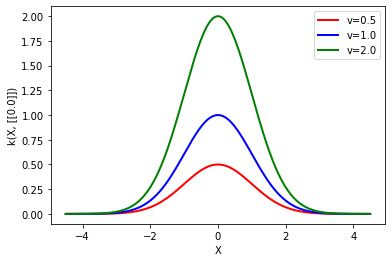

In [11]:
fig, ax = plt.subplots()
for variance, color in zip([0.5, 1.0, 2.0], ['r', 'b', 'g']):
    rbf_kernel = kernels.RBF(input_dim=1, active_dims=[0], lengthscale=1.0, variance=variance)
    rbf_kernel.plot(ax=ax, color=color, label=f"v={variance}")
ax.legend();

In [12]:
@interact(lengthscale=(0.5, 5.0), variance=(0.5, 5.0))
def plot(lengthscale, variance):
    rbf_kernel = kernels.RBF(input_dim=1, lengthscale=lengthscale, variance=variance)
    K = rbf_kernel.K(X,X)
    # Plot the covariance of the sample space
    plt.pcolor(X.T, X, K)
    plt.colorbar()

interactive(children=(FloatSlider(value=2.75, description='lengthscale', max=5.0, min=0.5), FloatSlider(value=…

## Matern family

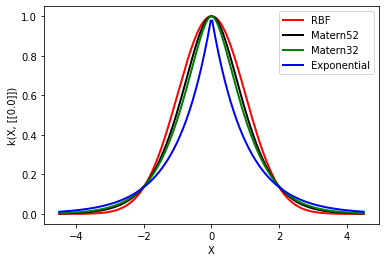

In [13]:
colors = ['r', 'k', 'g', 'b']
kernel_list = [kernels.RBF(1), kernels.Matern52(1), kernels.Matern32(1), kernels.Exponential(1)]

fig, ax = plt.subplots()
for kernel, color in zip(kernel_list, colors):
    kernel.plot(ax=ax, label=kernel.__class__.__name__, color=color)

ax.legend();

## Kernel combinations

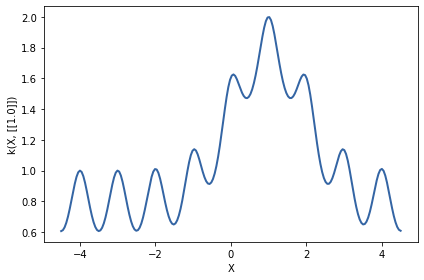

In [14]:
k1 = kernels.RBF(1)
k2 = kernels.StdPeriodic(1)

k = k1 + k2

k.plot();

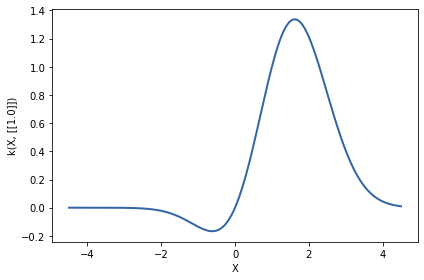

In [15]:
k1 = kernels.RBF(1, lengthscale=1.0)
k2 = kernels.Linear(1)

k = k1 * k2

k.plot();

## References

* https://nbviewer.org/github/gpschool/labs/blob/2022/answers/lab_1.ipynb
* https://gregorygundersen.com/blog/2019/09/12/practical-gp-regression/